<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/11_Implementation_Perspective_of_Learning_Rules_(Beyond_Perceptron_Rule).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11 Implementation: Perspective of Learning Rules (Beyond Perceptron Rule)


This section discusses various learning rules, including the Perceptron Learning Rule and more advanced learning rules such as the Delta Rule (Widrow-Hoff rule), Hebbian Learning, and Oja’s Rule. These learning mechanisms are essential for different learning paradigms, such as supervised learning, unsupervised learning, and reinforcement learning.

## Step 1: Perceptron Learning Rule


#### Explanation

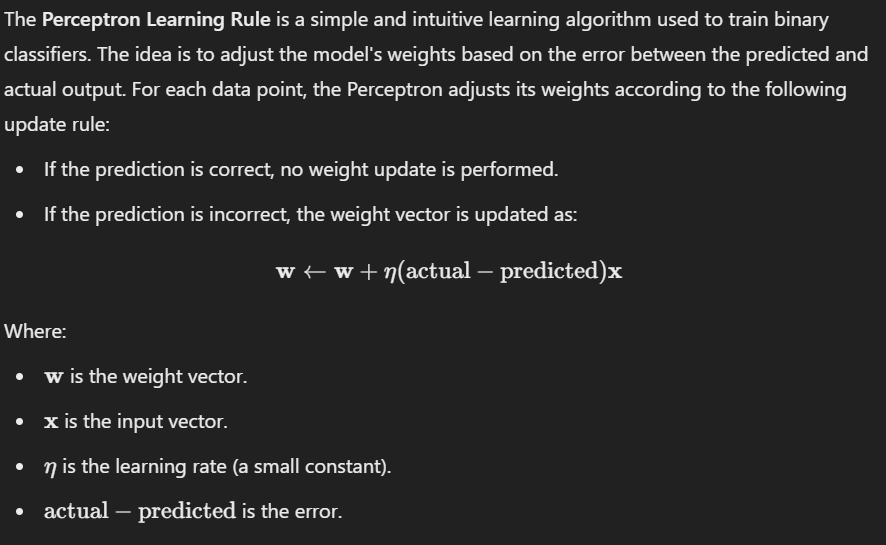

#### Implementation

In [2]:
import numpy as np

# Perceptron learning rule implementation
class Perceptron:
    def __init__(self, n_features, learning_rate=0.01):
        self.weights = np.zeros(n_features)  # Initialize weights to zero
        self.learning_rate = learning_rate

    def predict(self, X):
        return np.where(np.dot(X, self.weights) >= 0, 1, 0)  # Step function

    def train(self, X, y, epochs=100):
        for _ in range(epochs):
            for i in range(len(y)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]  # Update weights

# Example usage
X = np.array([[2, 3], [1, 1], [2, 2], [3, 1]])  # Feature inputs
y = np.array([1, 0, 1, 0])  # Binary outputs

perceptron = Perceptron(n_features=2)
perceptron.train(X, y)
print("Trained weights:", perceptron.weights)
print("Predictions:", perceptron.predict(X))



Trained weights: [-0.03  0.04]
Predictions: [1 1 1 0]


### Observations on Perceptron Learning Rule:


- Binary Classification: The Perceptron Learning Rule works well for linearly separable data but struggles with non-linearly separable data.

- Weight Updates: The learning rule updates the weights directly based on the prediction error, which can lead to convergence on linearly separable datasets.

- Limitations: The Perceptron algorithm cannot solve problems that are not linearly separable, such as the XOR problem. This limitation motivates more advanced learning rules.



## Step 2: More Advanced Learning Rules


### Delta Rule (Widrow-Hoff Rule)


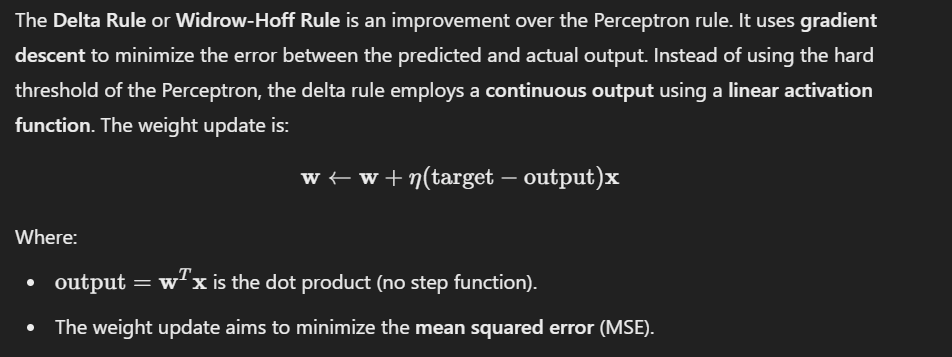

#### Implementation

In [3]:
class DeltaRule:
    def __init__(self, n_features, learning_rate=0.01):
        self.weights = np.zeros(n_features)  # Initialize weights to zero
        self.learning_rate = learning_rate

    def predict(self, X):
        return np.dot(X, self.weights)  # Linear output (no threshold)

    def train(self, X, y, epochs=100):
        for _ in range(epochs):
            for i in range(len(y)):
                output = self.predict(X[i])
                error = y[i] - output
                self.weights += self.learning_rate * error * X[i]  # Gradient descent update

# Example usage
delta_rule = DeltaRule(n_features=2)
delta_rule.train(X, y)
print("Trained weights (Delta Rule):", delta_rule.weights)


Trained weights (Delta Rule): [-0.11510776  0.43902649]


#### Observations on Delta Rule:

- Continuous Output: The Delta Rule produces a continuous output, which makes it applicable in regression tasks as well as binary classification (with further adjustments).

- Gradient Descent: The Delta Rule uses gradient descent to find the optimal weight vector that minimizes the mean squared error.

- Applicability: This learning rule is an improvement over the Perceptron Learning Rule and can handle non-linearly separable data by minimizing the error continuously.

### Hebbian Learning


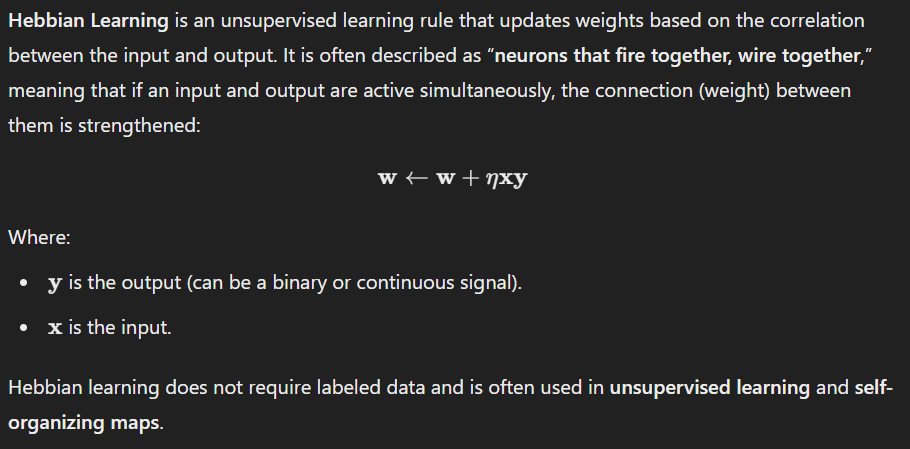

#### Implementation

In [6]:
class HebbianLearning:
    def __init__(self, n_features, learning_rate=0.01):
        self.weights = np.zeros(n_features)
        self.learning_rate = learning_rate # Assign learning_rate as an attribute of the object


    def train(self, X, y):
        for i in range(len(y)):
            self.weights += self.learning_rate * X[i] * y[i]  # Update weights based on correlation

# Example usage (assuming continuous output y)
hebbian = HebbianLearning(n_features=2)
hebbian.train(X, y)
print("Trained weights (Hebbian Learning):", hebbian.weights)


Trained weights (Hebbian Learning): [0.04 0.05]


#### Observations on Hebbian Learning:


- Unsupervised Learning: Hebbian Learning is unsupervised, meaning no labeled data is needed. The learning process strengthens connections based on the simultaneous activation of input-output pairs.

- Biological Inspiration: This rule is biologically inspired and reflects how neurons in the brain may learn by reinforcing patterns of activation.

- Self-organizing Maps: Hebbian Learning is foundational for models like Self-organizing Maps (SOMs), where weights are adjusted based on the proximity of the input to the output node.

### Oja's Rule


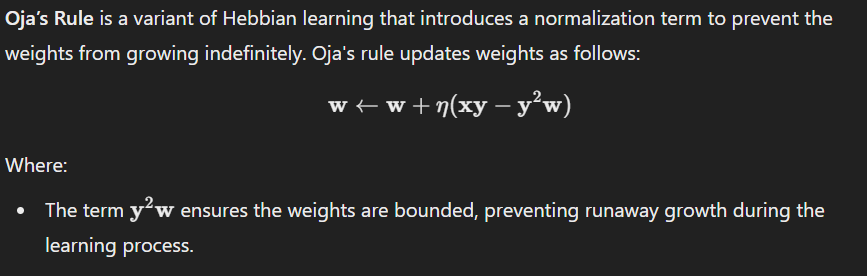

#### Implementation

In [9]:
class OjasRule:
    def __init__(self, n_features, learning_rate=0.01):
        self.weights = np.zeros(n_features)
        self.learning_rate = learning_rate

    def train(self, X, y):
        for i in range(len(y)):
            output = np.dot(self.weights, X[i])
            self.weights += self.learning_rate * (X[i] * output - (output**2) * self.weights)

# Example usage
ojas = OjasRule(n_features=2)
ojas.train(X, y)
print("Trained weights (Oja's Rule):", ojas.weights)


Trained weights (Oja's Rule): [0. 0.]


#### Observations on Oja's Rule:


- Weight Normalization: Oja's Rule introduces a normalization mechanism that keeps the weights from growing too large, addressing one of the key limitations of Hebbian Learning.

- Unsupervised Learning: Like Hebbian Learning, Oja’s Rule is unsupervised and can be applied in tasks where no labeled data is available.

- Principal Component Analysis (PCA): Oja’s Rule can be used in learning the principal component of input data, making it relevant in dimensionality reduction techniques.

## Step 3: Contribution of Learning Rules to Different Paradigms


These learning rules play crucial roles in different learning paradigms:

- Supervised Learning:

  - The Perceptron Learning Rule and Delta Rule are foundational in supervised learning. They rely on labeled data to adjust the model’s weights and make better predictions.

- Unsupervised Learning:

  - Hebbian Learning and Oja's Rule are primarily used in unsupervised learning where there is no labeled data. They are used in self-organizing maps, clustering, and feature extraction algorithms.

- Reinforcement Learning:

  - Some variants of Hebbian Learning and Oja’s Rule can be adapted for reinforcement learning, where agents learn by interacting with the environment and adjusting their weights based on rewards (not just predefined labels).

## Comparison of Learning Rules mentioned in this discussion

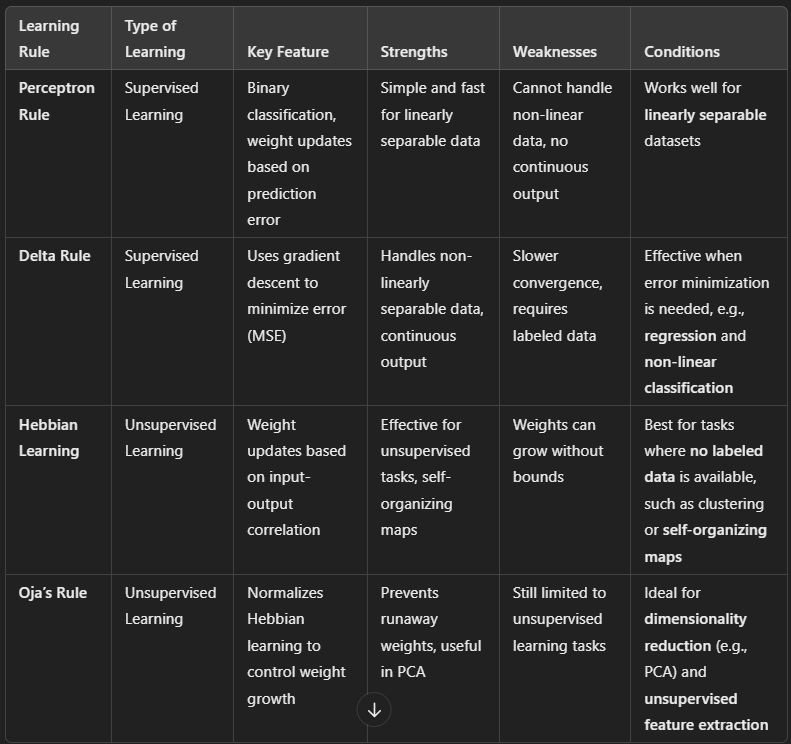